In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
# Training image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\Simion\\Desktop\\Sigmoid\\Fruits and Vegetables Image Recognition\\dataset\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3115 files belonging to 36 classes.


In [10]:
# Validation image preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\Simion\\Desktop\\Sigmoid\\Fruits and Vegetables Image Recognition\\dataset\\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [11]:
cnn = tf.keras.models.Sequential()
# Convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'))
# Pulling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2  ))

In [12]:
# Repeating for better results
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [13]:
cnn.add(tf.keras.layers.Flatten())
# Making neurons
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
# Avoid overfitting
cnn.add(tf.keras.layers.Dropout(0.5))
# Output layer, units as many as classes
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

In [14]:
# Compiling and training
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=35)


Epoch 1/35


98/98 [==============================] - 53s 492ms/step - loss: 6.4338 - accuracy: 0.0299 - val_loss: 4.1879 - val_accuracy: 0.0370
Epoch 2/35
98/98 [==============================] - 65s 646ms/step - loss: 3.8524 - accuracy: 0.0498 - val_loss: 3.4835 - val_accuracy: 0.0712
Epoch 3/35
98/98 [==============================] - 37s 365ms/step - loss: 3.5189 - accuracy: 0.0947 - val_loss: 3.4230 - val_accuracy: 0.1254
Epoch 4/35
98/98 [==============================] - 38s 369ms/step - loss: 3.0033 - accuracy: 0.1984 - val_loss: 2.8311 - val_accuracy: 0.3305
Epoch 5/35
98/98 [==============================] - 38s 373ms/step - loss: 2.3567 - accuracy: 0.3653 - val_loss: 1.2019 - val_accuracy: 0.7379
Epoch 6/35
98/98 [==============================] - 37s 366ms/step - loss: 1.5418 - accuracy: 0.5791 - val_loss: 0.6324 - val_accuracy: 0.8575
Epoch 7/35
98/98 [==============================] - 38s 370ms/step - loss: 0.9116 - accuracy: 0.7403 - val_loss: 0.3856 - val_accuracy: 0.9

In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

In [18]:
import json
# Saving model
cnn.save('trained_model.h5')
# Recording history
training_history.history
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history,f)

In [19]:
# Calculating accuracy
print("Validation set accuracy: {}".format(training_history.history['val_accuracy'][-1]))

Validation set accuracy: 0.9572649598121643


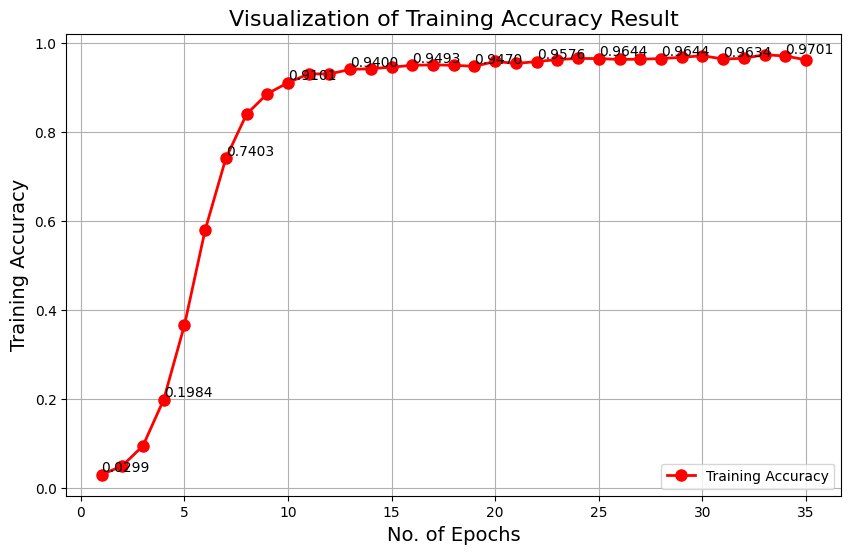

In [22]:
# Plotting Accuracy results by epochs
epochs = range(1, 36)  
plt.figure(figsize=(10, 6))  
plt.plot(epochs, training_history.history['accuracy'], color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('No. of Epochs', fontsize=14)
plt.ylabel('Training Accuracy', fontsize=14)
plt.title('Visualization of Training Accuracy Result', fontsize=16)
plt.grid(True)  # Add grid lines for better readability
plt.legend(['Training Accuracy'], loc='lower right')  # Add legend

# Add labels to data points
for i, acc in enumerate(training_history.history['accuracy']):
    if i%3 == 0:
        plt.text(epochs[i], acc, f'{acc:.4f}', ha='left', va='bottom')

plt.show()


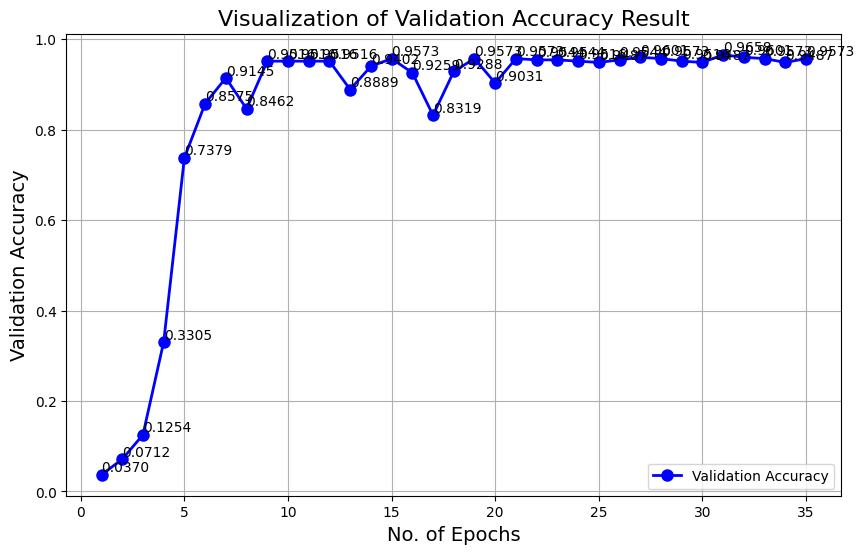

In [23]:
# Plotting Validation accuracy by epochs
epochs = range(1, 36)  
plt.figure(figsize=(10, 6))  

plt.plot(epochs, training_history.history['val_accuracy'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Validation Accuracy')

plt.xlabel('No. of Epochs', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.title('Visualization of Validation Accuracy Result', fontsize=16)
plt.grid(True)  
plt.legend(loc='lower right')  

# Add labels to data points for validation accuracy
for i, val_acc in enumerate(training_history.history['val_accuracy']):
    plt.text(epochs[i], val_acc, f'{val_acc:.4f}', ha='left', va='bottom')

plt.show()


In [24]:
# Test_set evaluation
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\Simion\\Desktop\\Sigmoid\\Fruits and Vegetables Image Recognition\\dataset\\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [25]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 4s 79ms/step - loss: 1.8169 - accuracy: 0.8663
Test accuracy: 0.8662952780723572


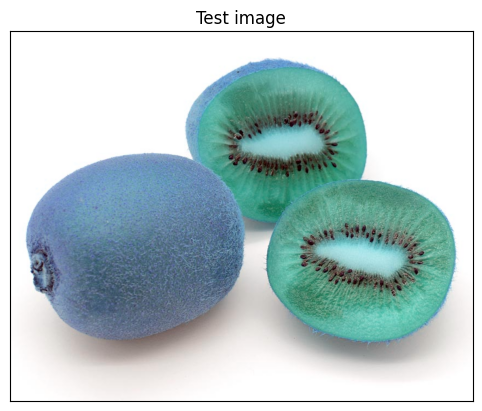

1/1 [==============================] - 0s 93ms/step
The image most likely a/an: kiwi


In [31]:
# Load your trained CNN model
cnn = tf.keras.models.load_model('C:\\Users\\Simion\\Desktop\\Sigmoid\\Fruits and Vegetables Image Recognition\\trained_model.h5')

# Path to the image you want to predict
image_path = 'C:\\Users\\Simion\\Desktop\\Sigmoid\\Fruits and Vegetables Image Recognition\\dataset\\kiwi.jpg'  
img = cv.imread(image_path)
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

# Transforming image into array
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

# Predicting
predictions = cnn.predict(input_arr)
result_index = np.where(predictions[0] == max(predictions[0]))
print(f'The image most likely a/an: {test_set.class_names[result_index[0][0]]}')
